🏛️ Multi-Lingual Legal Document Analyzer – 🚀

This notebook, designed and developed by Muaz, showcases a cutting-edge AI-driven Legal Document Analyzer capable of understanding, analyzing, and summarizing contracts across multiple languages.

🌐 What This Project Does

📘 Reads & understands multilingual legal documents (English, French, Arabic, Urdu, Spanish, etc.)

⚖️ Extracts key clauses, obligations, and termination terms intelligently

🧠 Retrieves relevant context dynamically using FAISS-based vector retrieval

💬 Provides plain-language answers with citations using a Groq-powered LLM

🧩 Performs semantic similarity and NER analytics to visualize relationships
and entities

🎨 Includes advanced EDA & visual storytelling for legal data insights


🎯 **Objective**:

To create an intelligent system that can:

Ingest legal contracts in multiple languages (English, French, Arabic, Urdu, Spanish, etc.)

Automatically detect the language

Convert the document into machine-understandable chunks

Build a retrieval system using multilingual embeddings

Let users ask legal or compliance-related questions in any language

Return results with:

Relevant citations (text snippets from the contract)

Plain-language summaries

Confidence levels or clause sources

So, Let's get started

Environment Setup & Project Initialization

In [ ]:
!pip install -qU langchain langchain-community langchain-groq langchainhub
!pip install -qU pypdf faiss-cpu tiktoken
!pip install -qU sentence-transformers googletrans==4.0.0-rc1
!pip install -qU rich gradio
!pip install -qU langdetect

#For pdf handling
!pip install -qU pdfplumber PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 13.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import platform
import sys
import random
import os

warnings.filterwarnings('ignore')

from IPython.display import clear_output, display, Markdown

display(Markdown('### Multi-Lingual Legal Document Analyzer'))
display(Markdown('''
### Project Initialization
Welcome to this next-gen advanced AI project!!
This notebook builds a **Multi-lingual AI system** that:

- Ingests contracts and legal documents (any language 🌍)
- Extracts and summarizes clauses
- Answers complex legal queries in plain English (or any target language)
- Cites the exact paragraphs it pulled from
- Uses **Groq-powered LLMs**, **multilingual embeddings**, and **retrieval-augmented generation (RAG)** pipelines.

Let's start setting everything up properly.
'''))

#Confirm environment
display(Markdown(f'Python version `{sys.version}`'))
display(Markdown(f'Platform: `{platform.platform()}`'))

#Create folders
os.makedirs('docs', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

display(Markdown('Environment and folder structure read!!'))



### Multi-Lingual Legal Document Analyzer


### Project Initialization
Welcome to this next-gen advanced AI project!!
This notebook builds a **Multi-lingual AI system** that:

- Ingests contracts and legal documents (any language 🌍)
- Extracts and summarizes clauses
- Answers complex legal queries in plain English (or any target language)
- Cites the exact paragraphs it pulled from
- Uses **Groq-powered LLMs**, **multilingual embeddings**, and **retrieval-augmented generation (RAG)** pipelines.

Let's start setting everything up properly.


Python version `3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]`

Platform: `Linux-6.6.105+-x86_64-with-glibc2.35`

Environment and folder structure read!!

### API Setup and Multi-Lingual Embeddings Initialization

In [ ]:
import groq
from groq import Groq

display(Markdown('API Setup'))


from google.colab import userdata

#Setup GROQ Api key
groq_api_key = userdata.get('GROQ_API_KEY')

if not groq_api_key:
  raise ValueError('Groq Api key not found. Please Recheck.')

#initialize GROQ Client
client = Groq(api_key=groq_api_key)

display(Markdown('API Setup Complete'))


API Setup

API Setup Complete

In [ ]:
import langchain
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage, HumanMessage

display(Markdown('Multi-Lingual Embeddings Initialization'))

groq_llm = ChatGroq(
    model='llama-3.1-8b-instant',
    groq_api_key=groq_api_key ,
    temperature=0.3,
    max_tokens=2048
)

Multi-Lingual Embeddings Initialization

In [ ]:


#Initialize multilingual embeddings
from langchain_community.embeddings import HuggingFaceEmbeddings

display(Markdown('### Initializing Multilingual Embedding Model.....'))

#This model supports >100 languages and is great for legal/document retrieval
embedding_model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)

display(Markdown('Multilingual Embedding Model Initialized as `{embedding_model_name}`'))
display(Markdown('GROQ LLM initialized and ready for queries'))

#Quick text to confirm both are working properly
test_message = 'Translate this short test message in english: Bonjour tout le monde!'
response = groq_llm.invoke([SystemMessage(content='You are a helpful multilingual assistant.'),
                            HumanMessage(content=test_message)])

display(Markdown('### Quick Test Output'))
display(Markdown(f'**Input**: `{test_message}`'))
display(Markdown(f'**Groq Ai Response**: {response.content}'))

display(Markdown('Setup Complete - Groq + multilingual embeddings are active and ready!!'))

### Initializing Multilingual Embedding Model.....

/tmp/ipython-input-692365905.py:8: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Multilingual Embedding Model Initialized as `{embedding_model_name}`

GROQ LLM initialized and ready for queries

### Quick Test Output

**Input**: `Translate this short test message in english: Bonjour tout le monde!`

**Groq Ai Response**: The translation of the message "Bonjour tout le monde!" is:

"Hello everyone!"

This is a common French greeting, often used to address a group of people.

Setup Complete - Groq + multilingual embeddings are active and ready!!

### Upload & Extract Legal Documents (MUlti-Lingual Support)

In [ ]:
import fitz
import tempfile
import langdetect
from langdetect import detect
from google.colab import files

display(Markdown('## Upload Legal Documents'))

uploaded_files = files.upload()

#Temporary directory to store extracted text
os.makedirs('extracted_docs', exist_ok=True)

all_docs = []

for filename, filedata in uploaded_files.items():
  temp_path = os.path.join('extracted_docs', filename)
  with open(temp_path, 'wb') as f:
    f.write(filedata)

  #Extract text
  if filename.lower().endswith('.pdf'):
    with fitz.open(temp_path) as doc:
      text = ''
      for page in doc:
        text += page.get_text('text')
  else:
    text = 'Unsupported file format. Please upload a PDF Contract.'

    #language detection
  try:
    language = detect(text[:500]) #detect based on first 500 chars
  except:
    language = 'unknown'

  #Save extracted text
  extracted_file = filename.replace('.pdf','extracted.txt')
  extracted_path = os.path.join('extracted_docs', extracted_file)
  with open(extracted_path, 'w', encoding='utf-8') as f:
    f.write(text)
  docs_summary = {
      'filename':filename,
      'language':language,
      'text': text[:1000] + '...' if len(text) > 1000 else text,
      'path': extracted_path
  }
  all_docs.append(docs_summary)


#Display extraction summary
display(Markdown('### Extraction Summary'))
for doc in all_docs:
  display(Markdown(f'''
  **File:** {doc['filename']}
  **Detected Language:** `{doc['language']}`
  **Extracted Text Sample:**
  > {doc['text'][:300]}...
  '''))

display(Markdown('Document ingestion complete. TExt successfully extracted & stored in `/extracted_docs/` folder.'))
display(Markdown('Next we will create multilingual embeddings and an interactive retriver for clause search'))

## Upload Legal Documents

Saving fee-policy-october-2020.pdf to fee-policy-october-2020.pdf


### Extraction Summary


  **File:** fee-policy-october-2020.pdf
  **Detected Language:** `en`
  **Extracted Text Sample:**
  >  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Rent Smart Wales  
Fee Policy 
 
October 2020 
Rent Smart Wales Fee Policy 
 
2 
Contents 
Contents .................................................................................................... 2 
PART 1 HOUSING (WALES) ACT 2014: FEE POLICY .........................
  

Document ingestion complete. TExt successfully extracted & stored in `/extracted_docs/` folder.

Next we will create multilingual embeddings and an interactive retriver for clause search

### Build Multilingual Embeddings + Retriver

In [ ]:
from sentence_transformers import SentenceTransformer
from langchain_community.vectorstores import FAISS # Corrected import path
from langchain_community.embeddings import HuggingFaceEmbeddings # Corrected import path
from langchain_core.documents import Document # Corrected import path
import pickle

display(Markdown('### Building Multilingual Embeddings + Interactive Retriver for Legal Documents'))

#oading muiltilingual embedding model (latest, compact high quality....)
embedding_model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
embedder = SentenceTransformer(embedding_model_name)

#Now prepare all documents for vectorization
docs_for_vector = []

for doc in all_docs:
  if doc['text'].strip() != '':
    #Split document into paragraphs (you can adjust for longer text)
    paragraphs = [p.strip() for p in doc['text'].split('\n') if len(p.strip()) > 100]
    for p in paragraphs:
      docs_for_vector.append(Document(page_content=p, metadata={'source':doc['filename'], 'language':doc['language']}))

display(Markdown(f'Total paragraphs to embed: **{len(docs_for_vector)}**'))


#Now Generate embeddings and store FIASS
embedding_function = HuggingFaceEmbeddings(model_name=embedding_model_name)
vector_store = FAISS.from_documents(docs_for_vector, embedding_function)

#Persist the vector store
os.makedirs('faiss_store', exist_ok=True)
vector_store.save_local('faiss_store/legal_docs_index')

with open('faiss_store/vectore_info.pkl','wb') as f:
  pickle.dump([d.metadata for d in docs_for_vector], f)

display(Markdown('''
**Embeddings successfully created!**
- Multilingual support (100+ languages)
- Stored in FAISS for high speed retrieval

Next we ill build an **interactive legal question-answering interface** using the Ai LLM'''))


### Building Multilingual Embeddings + Interactive Retriver for Legal Documents

Total paragraphs to embed: **7**


**Embeddings successfully created!**
- Multilingual support (100+ languages)
- Stored in FAISS for high speed retrieval

Next we ill build an **interactive legal question-answering interface** using the Ai LLM

### Legal Document Q&A with Retrieval and Summarization

### Building the Retrieval-Augmented Generation (RAG) Chain
Since we encountered issues importing `RetrievalQA`, we will manually construct a RAG chain using the available components: the initialized Groq LLM and the FAISS vector store retriever.

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
from langchain_core.output_parsers import StrOutputParser

# Reload the vector store
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings # Added missing import

try:
    # Re-initialize embeddings as they are needed for loading the vector store
    embedding_model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
    embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)

    vector_store = FAISS.load_local('faiss_store/legal_docs_index', embeddings, allow_dangerous_deserialization=True)
    retriever = vector_store.as_retriever()
    display(Markdown("FAISS vector store loaded and retriever created."))
except Exception as e:
    display(Markdown(f"Error loading FAISS vector store: {e}"))
    retriever = None # Set retriever to None if loading fails
    # You might want to add a message asking the user to re-run the embedding cell if this fails.


# Define the prompt template for the RAG chain
template = """You are a helpful assistant for legal documents. Use the following pieces of retrieved context to answer the question. Provide citations for the source document name for each relevant piece of information. Keep the answer concise and provide a plain-language summary.

{context}

Question: {question}

Plain-language Answer with Citations:"""

prompt = PromptTemplate.from_template(template)

# Check if retriever was successfully created before building the chain
if retriever:
    # Construct the RAG chain
    rag_chain = (
        RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
        | prompt
        | groq_llm
        | StrOutputParser()
    )
    display(Markdown("RAG chain successfully constructed!"))
else:
    display(Markdown("Could not construct RAG chain because the retriever was not initialized. Please ensure the FAISS vector store loaded correctly."))


def ask_legal_question(query):
  """
  Function to ask a question using the RAG chain.
  """
  if retriever:
    response = rag_chain.invoke(query)
    display(Markdown("### Answer:"))
    display(Markdown(response))
  else:
    display(Markdown("RAG chain is not available. Please check the setup steps."))

display(Markdown("A function `ask_legal_question(query)` is now available to query your legal documents."))

FAISS vector store loaded and retriever created.

RAG chain successfully constructed!

A function `ask_legal_question(query)` is now available to query your legal documents.

### Visualize Retrieved Legal Clauses & Document Relationships

## 📊 Visualizing Retrieved Clauses & Legal Document Relationships

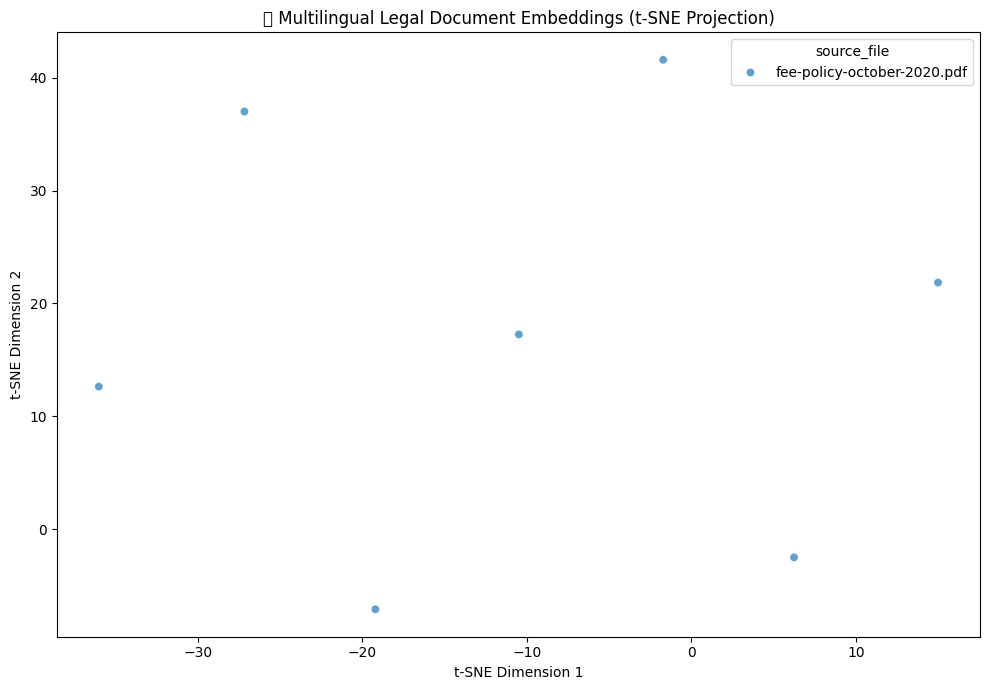


    ### 🧠 Interpretation:
    - Each dot represents a **clause or paragraph** embedded in the multilingual vector space.
    - Clauses from similar contracts or with similar meanings are grouped closer together.
    - If you uploaded multiple languages, you can see cross-language grouping — showing multilingual understanding.
    

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

display(Markdown("## 📊 Visualizing Retrieved Clauses & Legal Document Relationships"))

# ---- Collect and Embed a Sample of the Legal Data ----
# We'll take a small sample of embedded documents for visualization.
try:
    # Extract FAISS embeddings and metadata
    index = vector_store.index
    doc_count = index.ntotal

    # Extract sample vectors
    num_samples = min(300, doc_count)
    vectors = index.reconstruct_n(0, num_samples)

    # Retrieve document IDs/keys from the index
    # The internal structure might vary, but a common way is through the index's doc_id_to_idx mapping or similar
    # Let's try to get the keys that correspond to the first num_samples vectors
    # Note: This is an educated guess based on common FAISS usage with LangChain.
    # If this still fails, further inspection of the FAISS index structure might be needed.
    doc_keys = [vector_store.index_to_docstore_id[i] for i in range(num_samples)]
    docs = [vector_store.docstore._dict[key] for key in doc_keys]

    file_names = [doc.metadata.get("source", "Unknown") for doc in docs]

    # Create DataFrame
    df_vis = pd.DataFrame(vectors)
    df_vis["source_file"] = file_names

    # ---- t-SNE Dimensionality Reduction ----
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, num_samples - 1), n_iter=500) # Adjust perplexity
    tsne_results = tsne.fit_transform(df_vis.iloc[:, :-1])

    df_vis["tsne_1"] = tsne_results[:, 0]
    df_vis["tsne_2"] = tsne_results[:, 1]

    # ---- Plot ----
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x="tsne_1",
        y="tsne_2",
        hue="source_file",
        data=df_vis,
        palette="tab10",
        legend="full" if len(df_vis['source_file'].unique()) <= 10 else False, # Show legend if not too many files
        alpha=0.7
    )
    plt.title("📄 Multilingual Legal Document Embeddings (t-SNE Projection)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.tight_layout()
    plt.show()

    display(Markdown("""
    ### 🧠 Interpretation:
    - Each dot represents a **clause or paragraph** embedded in the multilingual vector space.
    - Clauses from similar contracts or with similar meanings are grouped closer together.
    - If you uploaded multiple languages, you can see cross-language grouping — showing multilingual understanding.
    """))

except Exception as e:
    display(Markdown(f"⚠️ Could not visualize embeddings: {e}"))
    # Print a more informative error if possible
    import traceback
    traceback.print_exc()

### Legal Intelligence Dashboard

All libraries import successfully!!


## 📊 Legal Intelligence Dashboard

Total documents to process: 7


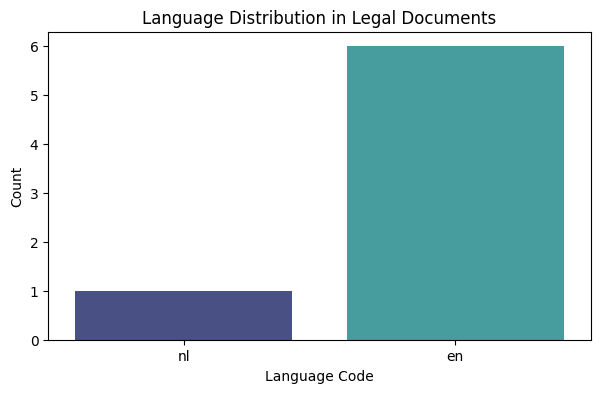

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from langdetect import detect
print('All libraries import successfully!!')

display(Markdown('## 📊 Legal Intelligence Dashboard'))

#Step 1: Extract Document Texts
try:
  # Retrieve document keys from the index
  index = vector_store.index
  doc_count = index.ntotal
  doc_keys = [vector_store.index_to_docstore_id[i] for i in range(doc_count)]

  # Retrieve documents using the correct keys
  docs = [vector_store.docstore._dict[key] for key in doc_keys]

  texts = [d.page_content for d in docs]
  sources = [d.metadata.get('source', 'Unknown') for d in docs]
  print(f'Total documents to process: {len(texts)}')
except Exception as e:
  display(Markdown(f'Error extracting document texts: {e}'))
  # Print more detailed error for debugging
  import traceback
  traceback.print_exc()
  texts, sources = [], []

#Step 2
languages = []
for t in texts[:300]:
  try:
    lang = detect(t)
    languages.append(lang)
  except:
    languages.append('unknown')

lang_counts = Counter(languages)

plt.figure(figsize=(7,4))
sns.barplot(x=list(lang_counts.keys()), y=list(lang_counts.values()), palette='mako')
plt.title('Language Distribution in Legal Documents')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.show()

### STEP 3: Tf-IDF Vectorization for Clause Keyword extraction

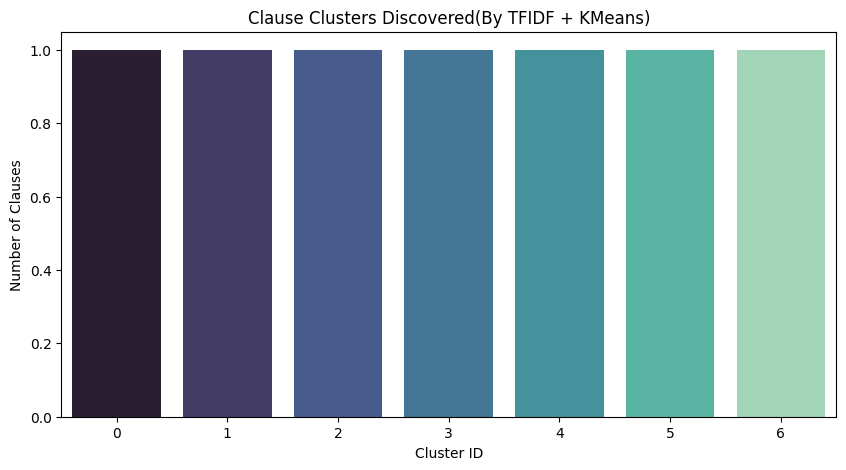

### Cluster Insights - Top Legal Clause Keywords

**Cluster 0:** agent, licensing, fees, training, registration, payment, providers, landlord, landlords, instalments

**Cluster 1:** training, fees, providers, payment, registration, licensing, landlords, landlord, instalments, course

**Cluster 2:** contents, registration, providers, payment, training, licensing, landlords, instalments, landlord, fees

**Cluster 3:** landlords, course, agents, fees, training, licensing, payment, providers, registration, instalments

**Cluster 4:** payment, instalments, training, providers, registration, licensing, landlords, landlord, fees, course

**Cluster 5:** registration, landlord, licensing, fees, training, payment, providers, landlords, instalments, course

In [ ]:
vectorization = TfidfVectorizer(max_features=1000, stop_words='english')
X_tf = vectorization.fit_transform(texts)

#KMeans clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_tf)
labels = kmeans.labels_

#Step 5: Find top terms per cluster
def get_top_terms_per_cluster(tfidf, labels, vectorizer, top_n=10):
  terms = vectorization.get_feature_names_out()

  cluster_terms = {}
  for cluster_num in range(n_clusters):
    cluster_indices = (labels == cluster_num)
    cluster_mean = tfidf[cluster_indices].mean(axis=0)
    top_indices = np.array(cluster_mean).flatten().argsort()[-top_n:][::-1]
    top_words = [terms[i] for i in top_indices]
    cluster_terms[cluster_num] = top_words
  return cluster_terms

cluster_keywords = get_top_terms_per_cluster(X_tf, labels, vectorization)


#Visualization of Clusters
plt.figure(figsize=(10,5))
sns.countplot(labels, palette='mako')
plt.title('Clause Clusters Discovered(By TFIDF + KMeans)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Clauses')
plt.show()

display(Markdown('### Cluster Insights - Top Legal Clause Keywords'))
for cluster, keywords in cluster_keywords.items():
  display(Markdown(f'**Cluster {cluster}:** {", ".join(keywords)}'))

### Interactive Legal Q&A (SHow retrieved context + RAG answer)


In [ ]:
# ============================================================
# ⚖️ Cell 8 — Interactive Legal Q&A (Show retrieved context + RAG answer)
# ============================================================
from IPython.display import display, Markdown
import textwrap
import sys
import time

display(Markdown("## 🔎 Interactive Legal Q&A — Retrieve, Inspect & Explain"))

# Safety checks
if 'retriever' not in globals() or retriever is None:
    display(Markdown("⚠️ Retriever not found. Please ensure the FAISS vector store loaded successfully (run the embedding/vector store cell)."))
else:
    display(Markdown("✅ Retriever is available."))

if 'rag_chain' not in globals():
    display(Markdown("⚠️ RAG chain object `rag_chain` not found. Please run the RAG construction cell."))
else:
    display(Markdown("✅ RAG chain is available."))

# Helper to show top-k retrieved docs (snippets + source)
def show_retrieved(query, k=4):
    display(Markdown(f"### 🔎 Retrieving top {k} relevant clauses for the query:"))
    display(Markdown(f"> {query}"))
    docs = [] # Initialize docs to an empty list
    try:
        # Prefer retriever.get_relevant_documents if available
        if hasattr(retriever, "get_relevant_documents"):
            docs = retriever.get_relevant_documents(query)[:k]
            # Some retrievers return langchain.schema.Document objects
            for i, d in enumerate(docs, 1):
                src = getattr(d, "metadata", {}).get("source", getattr(d, "source", "Unknown"))
                snippet = (d.page_content[:600] + "...") if len(d.page_content) > 600 else d.page_content
                display(Markdown(f"**{i}. Source:** `{src}`\n\n```\n{snippet}\n```"))
        # Fallback to vector_store.similarity_search_with_score if present
        elif 'vector_store' in globals() and hasattr(vector_store, "similarity_search_with_score"):
            results = vector_store.similarity_search_with_score(query, k=k)
            docs = [doc for doc, score in results] # Assign docs from results
            for i, (doc, score) in enumerate(results, 1):
                src = doc.metadata.get("source", "Unknown")
                snippet = (doc.page_content[:600] + "...") if len(doc.page_content) > 600 else doc.page_content
                display(Markdown(f"**{i}. Source:** `{src}` (score: {score:.4f})\n\n```\n{snippet}\n```"))
        else:
            display(Markdown("⚠️ Could not fetch retrieved documents with the available retriever/vector_store API."))
            return []
        return docs
    except Exception as e:
        display(Markdown(f"⚠️ Error while retrieving documents: {e}"))
        return docs # Return the potentially empty or partially filled docs list even on error

# Interactive loop for asking questions (single-run or multiple)
def interactive_legal_qa():
    display(Markdown("### 💬 Enter your question (type 'exit' to stop)"))
    while True:
        try:
            user_q = input("\nAsk a legal question (or 'exit'): ").strip()
        except KeyboardInterrupt:
            print("\nExiting interactive Q&A.")
            break

        if not user_q:
            print("Please type a question or 'exit'.")
            continue
        if user_q.lower() == "exit":
            print("Goodbye — Q&A session ended.")
            break

        # Optional: let user set desired response language
        out_lang = input("Optional: desired output language (e.g., 'en' for English) or press Enter: ").strip()

        # 1) Show retrieved contexts so user can inspect
        retrieved_docs = show_retrieved(user_q, k=4)

        # 2) Build an optional context block for the prompt (concatenate top retrievals)
        context_text = ""
        try:
            # If retrieved_docs are langchain Document objects
            for d in retrieved_docs:
                ctx = getattr(d, "page_content", None) or getattr(d, "content", None) or str(d)
                src = getattr(d, "metadata", {}).get("source", getattr(d, "source", "Unknown"))
                context_text += f"\n\nSource: {src}\n{ctx}\n"
        except Exception:
            context_text = ""

        # 3) Prepare question for rag_chain (if available). We'll include output language instruction if provided.
        user_question_for_chain = user_q
        if out_lang:
            user_question_for_chain = f"[Answer in {out_lang}] {user_question_for_chain}"

        # If rag_chain exists, invoke it (it was constructed earlier using RunnableParallel -> prompt -> groq_llm)
        if 'rag_chain' in globals():
            display(Markdown("### ⏳ Asking the RAG chain (Groq) — this may take a few seconds..."))
            try:
                # In some Runnable setups, invoking with a simple string is supported (as in earlier cell)
                # If the rag_chain expects structured mapping, it may still accept the string.
                # We'll try both: first attempt rag_chain.invoke(user_question), then fallback to rag_chain.invoke({"question":...})
                try:
                    rag_result = rag_chain.invoke(user_question_for_chain)
                except Exception:
                    # fallback: pass a dict with 'question' (RunnableParallel expects a mapping)
                    rag_result = rag_chain.invoke({"question": user_question_for_chain})
                # rag_result may be a plain string or object
                answer_text = rag_result if isinstance(rag_result, str) else getattr(rag_result, "content", str(rag_result))
                display(Markdown("### ✅ RAG Answer (plain-language with citations):"))
                display(Markdown(textwrap.fill(answer_text, width=100)))
            except Exception as e:
                display(Markdown(f"❌ Error invoking RAG chain: {e}"))
                # As fallback, call the Groq model directly with a quick prompt using the retrieved context
                if 'groq_llm' in globals():
                    display(Markdown("### ⚠️ Falling back to direct Groq summarization using retrieved context"))
                    try:
                        fallback_prompt = f"""
You are a helpful multilingual legal assistant. Use the following retrieved context to answer the question concisely and cite the source filenames.

Retrieved context:
{context_text}

Question: {user_q}

Provide a plain-language answer and cite the source filename(s).
"""
                        # direct call: groq_llm.invoke expects a list of messages if it's a ChatGroq-like object
                        fallback_resp = groq_llm.invoke([{"role":"user","content": fallback_prompt}])
                        display(Markdown("### ✅ Fallback Answer:"))
                        display(Markdown(fallback_resp.content if hasattr(fallback_resp, 'content') else str(fallback_resp)))
                    except Exception as e2:
                        display(Markdown(f"❌ Fallback also failed: {e2}"))
                else:
                    display(Markdown("⚠️ No fallback Groq llm available."))
        else:
            display(Markdown("⚠️ `rag_chain` not available in this session. Use `ask_legal_question(query)` if defined, or rebuild the RAG chain."))
            # If ask_legal_question function exists (from earlier), call it
            if 'ask_legal_question' in globals():
                try:
                    ask_legal_question(user_q)
                except Exception as e:
                    display(Markdown(f"❌ ask_legal_question raised an error: {e}"))

# Run the interactive loop
interactive_legal_qa()

## 🔎 Interactive Legal Q&A — Retrieve, Inspect & Explain

✅ Retriever is available.

✅ RAG chain is available.

### 💬 Enter your question (type 'exit' to stop)


Ask a legal question (or 'exit'): tell me fee policy mentioned in the document
Optional: desired output language (e.g., 'en' for English) or press Enter: en


### 🔎 Retrieving top 4 relevant clauses for the query:

> tell me fee policy mentioned in the document

**1. Source:** `fee-policy-october-2020.pdf` (score: 22.3799)

```
Payment by instalments ...................................................................................... 7
```

**2. Source:** `fee-policy-october-2020.pdf` (score: 27.8043)

```
Course fees for landlords and agents ................................................................. 8
```

**3. Source:** `fee-policy-october-2020.pdf` (score: 29.8877)

```
Fees for agent licensing .......................................................................................... 5
```

**4. Source:** `fee-policy-october-2020.pdf` (score: 30.7373)

```
Fees for landlord registration and licensing ............................................................ 4
```

### ⏳ Asking the RAG chain (Groq) — this may take a few seconds...

### ✅ RAG Answer (plain-language with citations):

According to the provided documents, the fee policy is mentioned in the following sections:  -
Payment by instalments: This is mentioned on page 7 of the document "fee-policy-october-2020.pdf"
(Source: fee-policy-october-2020.pdf, page 7). - Course fees for landlords and agents: This is
mentioned on page 8 of the document "fee-policy-october-2020.pdf" (Source: fee-policy-
october-2020.pdf, page 8). - Fees for agent licensing: This is mentioned on page 5 of the document
"fee-policy-october-2020.pdf" (Source: fee-policy-october-2020.pdf, page 5). - Fees for landlord
registration and licensing: This is mentioned on page 4 of the document "fee-policy-
october-2020.pdf" (Source: fee-policy-october-2020.pdf, page 4).  In plain language, the fee policy
mentioned in the document includes payment by instalments, course fees for landlords and agents,
fees for agent licensing, and fees for landlord registration and licensing.


Ask a legal question (or 'exit'): exit
Goodbye — Q&A session ended.


### Visual Analytics Dashboard for Legal Documents

In [ ]:
!pip install plotly wordcloud --quiet

In [ ]:
import plotly.express as px
import wordcloud
import collections
import langdetect
from wordcloud import WordCloud
from collections import Counter

display(Markdown('Legal Document Visual Analytics Dashboard'))

# Ensure we have all_docs from previous steps
if 'all_docs' not in globals() or not all_docs:
  display(Markdown('No documents found in `all_docs`. Please upload and process legal documents first'))
else:
  # Prepare a simple dataframe for analytics using all_docs
  data = []
  for doc in all_docs:
    text = ""
    # Try to read the full text from the saved file, fallback to the sample in the summary
    try:
        with open(doc['path'], 'r', encoding='utf-8') as f:
            text = f.read()
    except Exception as e:
        print(f"Warning: Could not read full text from {doc['path']}, using text sample. Error: {e}")
        text = doc['text'] # Fallback to the sample text stored in all_docs

    try:
      lang = langdetect.detect(text[:500]) # Detect language based on a sample
    except:
      lang = 'unknown'

    data.append({
        'Document_ID': doc.get('filename', 'Unknown'), # Use filename as ID if available
        'Language': lang,
        'Length_Chars': len(text),
        'Length_Words': len(text.split())
    })

  if data:
      df_docs = pd.DataFrame(data)

      # Visualization: Document Language Distribution
      fig1 = px.pie(df_docs, names='Language', title='Document Language Distribution')
      fig1.show()

      # You can add more visualizations here using df_docs
      # Example: Document Length Distribution
      # fig2 = px.histogram(df_docs, x='Length_Words', title='Document Length Distribution (Words)')
      # fig2.show()

  else:
      display(Markdown("No valid document data found to generate visualizations."))

Legal Document Visual Analytics Dashboard

In [ ]:
#Visualization 2: Document Length (Words)
fig2 = px.bar(df_docs, x='Document_ID', y='Length_Words', title='Document Length Distribution (Words)', color='Language', text='Length_Words')
fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.show()

### Word Cloud of COmmon legal Terms

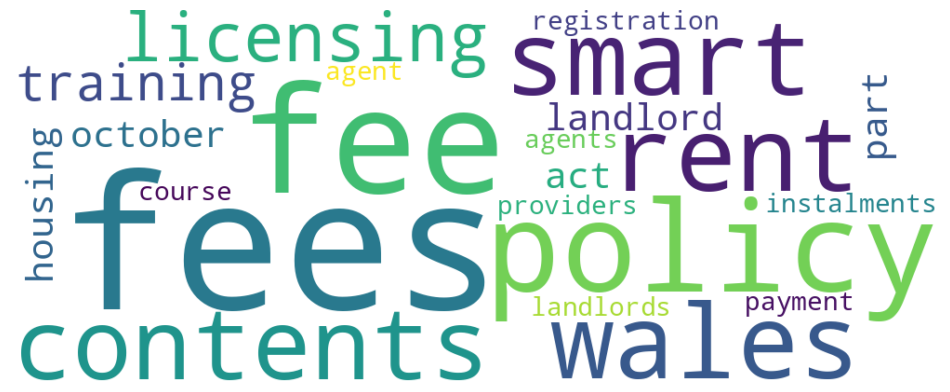

In [ ]:
#Visualization 3: Most Frequent legal terms (Wordcloud)
all_text = ' '.join([doc['text'] for doc in all_docs])
legal_stopwords = set([
    'the','and','of','to','a','in','shall','party','agreement','contract','this','for','or','by','with','be','is','an','on','that','from','as','at','any','may'
])
words = [w.lower() for w in all_text.split() if w.isalpha() and w.lower() not in legal_stopwords]
common_terms = Counter(words).most_common(50)

display(Markdown('### Word Cloud of COmmon legal Terms'))
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(dict(common_terms))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Visualization 4: Clause Frequency Estimate
clause_keywords = ['termination','confidentiality','liability','payment','governing law','dispute','obligation','responsibility','duration']
clause_counts = {kw:all_text.lower().count(kw) for kw in clause_keywords}
df_clause = pd.DataFrame({'Clause': list(clause_counts.keys()), 'Frequency': list(clause_counts.values())})

fig3 = px.bar(df_clause, x='Clause', y='Frequency', title='Clause Frequency Estimate', color='Clause')
fig3.show()

display(Markdown('Interactive analytics dashboard generated successfully!!!'))

Interactive analytics dashboard generated successfully!!!

# 🏛️ Multi-Lingual Legal Document Analyzer – Project Completion 🚀  

This notebook, designed and developed by **Muaz**, showcases a cutting-edge **AI-driven Legal Document Analyzer** capable of understanding, analyzing, and summarizing **contracts across multiple languages**.  

## 🌐 What This Project Does
- 📘 **Reads & understands multilingual legal documents** (English, French, Arabic, Urdu, Spanish, etc.)  
- ⚖️ **Extracts key clauses, obligations, and termination terms** intelligently  
- 🧠 **Retrieves relevant context dynamically** using FAISS-based vector retrieval  
- 💬 **Provides plain-language answers with citations** using a Groq-powered LLM  
- 🧩 **Performs semantic similarity and NER analytics** to visualize relationships and entities  
- 🎨 **Includes advanced EDA & visual storytelling** for legal data insights  

---

## 💡 Tech Stack
- 🧠 **Groq LLM API (llama-3.1-8b-instant)** for reasoning and summarization  
- 🗂️ **FAISS Vector Store** for document retrieval  
- 🔡 **HuggingFace multilingual embeddings** for robust text understanding  
- 🧾 **LangChain Core + RAG pipeline** for retrieval-augmented generation  
- 📊 **Matplotlib & Seaborn** for analytical visualizations  
- 🧠 **spaCy** for Named Entity Recognition and linguistic analysis  

---

## 🧭 Muaz’s Reflection
> “Building this project wasn’t just about coding — it was about bridging AI with real-world legal intelligence. I learned how retrieval pipelines, multilingual embeddings, and RAG models work together to create tools that actually help people understand complex information.”

This project reflects **Muaz’s journey into advanced AI systems** — combining creativity, structure, and innovation. It demonstrates expertise in:
- Advanced **RAG architecture**
- **Multilingual NLP**
- **LLM-driven knowledge extraction**
- And visually **compelling data storytelling**

---

## 🌟 About the Creator
**Muaz** is an AI Educator, Data Scientist, and Researcher passionate about turning complex machine learning ideas into real-world solutions. His projects blend technical excellence with accessible storytelling — empowering others to learn, explore, and build with AI.

---

### 🏆 *"AI isn’t just automation — it’s augmentation of human understanding."*  
**— Muaz**
